# Spatial map of precipitation in comparison to climatology for overview paper

IMERG 0.1 degree 30-minute precipitation

In [1]:
import geopy.distance
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
import numpy as np
import xarray as xr
import json
import cartopy
import pandas as pd
from datetime import datetime, timedelta
import cftime
#from adjustText import adjust_text
import glob
import os

### Set region to plot and campaign time period to average over

In [2]:
lonMin, lonMax = -62.1, -9.9
latMin, latMax = -2.1, 22.1

start_mon = 'Aug.'
start_day = '10'
start_time = '08-'+start_day+'T00:00:00'
end_mon = 'Sep.'
end_day = '30'
end_time = '09-'+end_day+'T00:00:00'

Longitudes to take zonal mean over

In [3]:
lon1 = -30
lon2 = -20

Spatial/temporal subsets

In [4]:
East = np.array([[-34.0, 13.5], [-20.0, 13.5], [-20.0, 3.5], [-34.0, 3.5]])
West = np.array([[-59.0, 16], [-45.0, 16], [-45.0, 6], [-59.0, 6]])
North = np.array([[-25.0, 13.5], [-20.0, 13.5], [-20.0, 18.5], [-25.0, 18.5]])

East_latmin = 3.5
East_latmax = 13.5
East_lonmin = -34.0
East_lonmax = -20.0

West_latmin = 6.0
West_latmax = 16.0
West_lonmin = -59.0
West_lonmax = -45.0

North_latmin = 13.5
North_latmax = 18.5
North_lonmin = -25.0
North_lonmax = -20.0

East_date1 = '08-10T00:00:00'
East_date2 = '09-05T00:00:00'
West_date1 = '09-05T00:00:00'
West_date2 = '09-30T00:00:00'
North_date1 = '08-10T00:00:00'
North_date2 = '09-10T00:00:00'

### Load precipitation from IMERG

Load IMERG data that has already been combined and reorganized (by process_imerg_finalrun.py) for 2024

 ** Only need to do this if want to change the dates of the time mean or change the dates of the means for the East, West, North subregions

In [3]:
# Load IMERG data
yy = 2024
imerg = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/imerg/imerg_finalrun_'+ str(yy) + '0809.nc')

# Convert cftime.DatetimeJulian to pandas.DatetimeIndex
imergtimes = imerg['time'].values
imergtimes_converted = pd.to_datetime([t.strftime('%Y-%m-%d %H:%M:%S') for t in imergtimes])
imerg['time'] = imergtimes_converted


In [4]:
#Extract for time period of campaign and region
imerg2024 = imerg.sel(lat=slice(latMin,latMax),lon=slice(lonMin,lonMax),time=slice(str(yy)+'-'+start_time,str(yy)+'-'+end_time))

#Take mean over campaign
imerg2024mean = imerg2024.mean(dim='time')

In [197]:
#Save to netcdf file (mean at each grid point over campaign time period in 2024)
imerg2024mean.to_netcdf('imerg_campaign_mean_2024.nc')

Mean over campaign time period [10 August to 30 September 2024] from IMERG


In [5]:
#load data that has already been averaged over campaign time period
imerg2024mean = xr.open_dataset('imerg_campaign_mean_2024.nc')
imerg2024mean

<xarray.Dataset> Size: 514kB
Dimensions:        (lat: 242, latv: 2, lon: 522, lonv: 2, nv: 2)
Coordinates:
  * lat            (lat) float32 968B -2.05 -1.95 -1.85 ... 21.85 21.95 22.05
  * latv           (latv) int32 8B 0 1
  * lon            (lon) float32 2kB -62.05 -61.95 -61.85 ... -10.05 -9.95
  * lonv           (lonv) int32 8B 0 1
  * nv             (nv) int32 8B 0 1
Data variables:
    lat_bnds       (lat, latv) float32 2kB ...
    precipitation  (lat, lon) float32 505kB ...
    lon_bnds       (lon, lonv) float32 4kB ...

Climatological mean and zonal mean data for individual years that has already been processed (by process_imerg_finalrun_climo.py)

In [9]:
#open climo data
years_imerg = np.arange(1998,2024) #1998-2023
#imergClimoMean = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/imerg/imerg_campaign_climo_1998_2023.nc')
imergClimoMean = xr.open_dataset('imerg_campaign_climo_1998_2023.nc')

In [7]:
#open zonal mean data [20W to 30W]
#imerg_zonalmean_precip = xr.open_dataset('/huracan/tank4/cornell/ORCESTRA/imerg/imerg_zonalmean_precip_1998_2023.nc')
imerg_zonalmean_precip = xr.open_dataset('imerg_zonalmean_precip_1998_2023.nc')

Zonal mean of climo and 2024

In [10]:
zonalmean_precip_climo = imergClimoMean.precipitation.sel(lon=slice(lon1,lon2)).mean(dim='lon')
zonalmean_precip_2024 = imerg2024mean.precipitation.sel(lon=slice(lon1,lon2)).mean(dim='lon')

Some stats (need full imerg2024 data available to recalculate)

In [ ]:
# mean over east/west/north
imerg2024East = imerg.sel(lat=slice(East_latmin,East_latmax),lon=slice(East_lonmin,East_lonmax),time=slice(str(yy)+'-'+East_date1,str(yy)+'-'+East_date2))
imerg2024mean_East = imerg2024East.mean(dim=['time','lon','lat'])
#round to 1 decimal place
Eastmean = np.round(imerg2024mean_East.precipitation.values*24, 1)

imerg2024West = imerg.sel(lat=slice(West_latmin,West_latmax),lon=slice(West_lonmin,West_lonmax),time=slice(str(yy)+'-'+West_date1,str(yy)+'-'+West_date2))
imerg2024mean_West = imerg2024West.mean(dim=['time','lon','lat'])
#round to 1 decimal place
Westmean = np.round(imerg2024mean_West.precipitation.values*24, 1)

imerg2024North = imerg.sel(lat=slice(North_latmin,North_latmax),lon=slice(North_lonmin,North_lonmax),time=slice(str(yy)+'-'+North_date1,str(yy)+'-'+North_date2))
imerg2024mean_North = imerg2024North.mean(dim=['time','lon','lat'])
#round to 1 decimal place
Northmean = np.round(imerg2024mean_North.precipitation.values*24, 1)

In [13]:
#max zonal mean
maxprecip = np.round(zonalmean_precip_2024.values.max()*24, 1)

#Stored values if they were previously calculated
Eastmean = 10.0
Westmean = 2.8
Northmean = 0.6

#print the means
print('East mean precipitation:', Eastmean)
print('West mean precipitation:', Westmean)
print('North mean precipitation:', Northmean)
print('Max zonal mean precipitation:', maxprecip)


East mean precipitation: 10.0
West mean precipitation: 2.8
North mean precipitation: 0.6
Max zonal mean precipitation: 17.1


### Make plot

/tmp/ipykernel_2179729/693036174.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust subplots to fit into figure area.


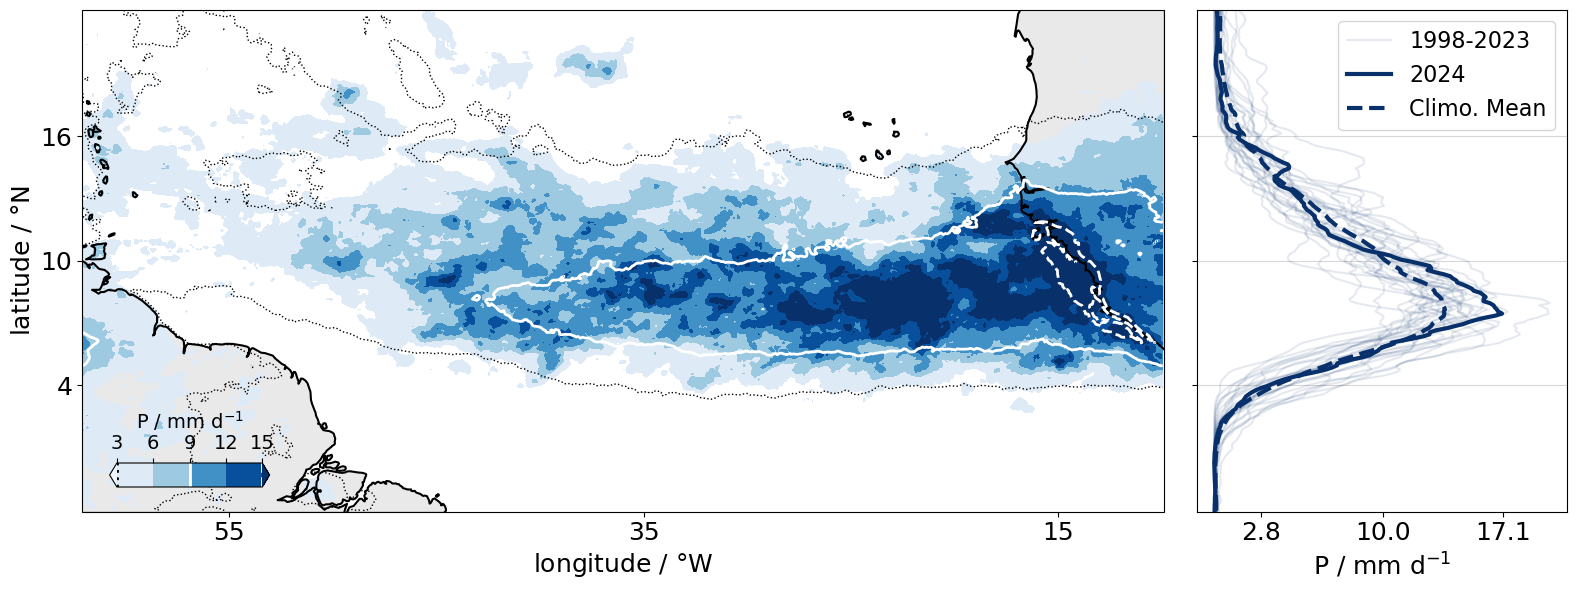

In [15]:
# plot imerg precip
fig = plt.figure(figsize = (16, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

ax1 = fig.add_subplot(gs[0],projection=ccrs.PlateCarree())
ax1.set_extent([lonMin, lonMax, latMin, latMax], crs=ccrs.PlateCarree())
ax1.coastlines(resolution = '50m',alpha=1.0,linewidth=1.5)
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.set_yticks([4, 10, 16])
ax1.yaxis.tick_left()
ax1.yaxis.set_label_position("left")
ax1.set_xticks([-55,-35,-15])
ax1.set_xticklabels([55,35,15])
ax1.tick_params(labelsize=18)
ax1.set_ylabel(r"latitude / $\degree$N", fontsize=18)
ax1.set_xlabel(r"longitude / $\degree$W", fontsize=18)

n_lines = 5
n_lev = 5
cmap_blues = mpl.colormaps['Blues']

# Take colors at regular intervals spanning the colormap.
bluescolors = cmap_blues(np.linspace(0, 1, n_lines))

blues_aaw = cmap_blues.copy()
blues_aaw.set_under(color='white',alpha=0.5) #set values below vmin

####################
## Plot 2024 precip as filled contours
####################
contourplot = plt.contourf(imerg2024mean.lon.values,
            imerg2024mean.lat.values,
            imerg2024mean.precipitation.values*24,
            cmap = blues_aaw, levels = np.linspace(3,15,n_lev),extend='both')

####################
## Plot climo precip as contours
####################
# Define contour levels, colors, and linestyles
contour_levels = [3, 9, 15]
contour_colors = ['black', 'white', 'white']
contour_styles = ['dotted', 'solid', 'dashed']
contour_widths = [1, 2, 2]

# Plot the contours on the map
for level, color, linestyle, width in zip(contour_levels, contour_colors, contour_styles, contour_widths):
    plt.contour(imergClimoMean.lon.values, imergClimoMean.lat.values, imergClimoMean.precipitation.values*24, 
                levels=[level], colors=color, linestyles=linestyle, linewidths=width)
    
cbar_ax = fig.add_axes([0.08, 0.18, 0.1, 0.04])  # [left, bottom, width, height] in figure fraction
cbar = plt.colorbar(contourplot, cax=cbar_ax, orientation='horizontal')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')
cbar.set_label(r'P / mm d$^{-1}$',fontsize=14)  #add a label to the colorbar
cbar.set_ticks(np.linspace(3,15,n_lev))
cbar.set_ticklabels([f'{x:.0f}' for x in np.linspace(3,15,n_lev)],fontsize=14)

# Manually add styled lines to the colorbar
for level, color, linestyle in zip(contour_levels, contour_colors, contour_styles):
    cbar_ax.vlines(x=level, ymin=0, ymax=1.5, colors=color, linestyles=linestyle, linewidth=2)


#################
# Set the plot limits and title
#################
#ax1.set_title(start_day+' '+start_mon+' - '+end_day+' '+end_mon + ' Mean Precipitation',size=18)
ax1.set_xlim(lonMin, lonMax)
ax1.set_ylim(latMin, latMax)

################
# Plot zonal mean precip
################
ax2 = fig.add_subplot(gs[1])

for i in range(len(years_imerg)):
    if i == 0:
        ax2.plot(imerg_zonalmean_precip.precipitation[i].values*24,imerg_zonalmean_precip.lat,label=str(years_imerg[0]) + '-' + str(years_imerg[-1]),color=bluescolors[4,:],alpha=0.1,linestyle='-')
    else:
        ax2.plot(imerg_zonalmean_precip.precipitation[i].values*24,imerg_zonalmean_precip.lat,color=bluescolors[4,:],alpha=0.1,linestyle='-')

ax2.plot(zonalmean_precip_2024.values*24,zonalmean_precip_2024.lat,label='2024',color=bluescolors[4,:],linewidth=3)
ax2.plot(zonalmean_precip_climo.values*24,zonalmean_precip_climo.lat,label='Climo. Mean',color=bluescolors[4,:],linestyle='--',linewidth=3)

#ax2.set_xticks(np.linspace(3,15,n_lev))
ax2.set_xticks([Westmean, Eastmean, maxprecip])
plt.setp(ax2.get_xticklabels(), fontsize=18)
#plt.setp(ax2.get_yticklabels(), fontsize=18)
ax2.set_yticks([4,10,16])
ax2.set_yticklabels([])
ax2.grid(True,which='major',axis='y',alpha=0.5)
ax2.legend(fontsize=16)
ax2.set_ylim([latMin,latMax])
#ax2.set_ylabel('Latitude',size=18)
ax2.set_xlabel(r'P / mm d$^{-1}$',size=18)
#ax2.set_title(str(-1*lon1) + r"$\degree$W - " + str(-1*lon2) + r"$\degree$W Zonal Mean",size=18)

plt.tight_layout()  # Adjust subplots to fit into figure area.

# Save figure
plt.savefig('Fig_precip_zonalmean_2024_wclimo_IMERG.pdf')